### Importing Libraries

In [3]:
import pandas as pd
import plotly.express as px
from urllib.request import urlopen
import json
from bokeh.io import show
from bokeh.io import output_file, save
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          CategoricalColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.io import output_notebook
from bokeh.plotting import figure
import geopandas as gpd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Reading Dataset

In [4]:
df = pd.read_csv('C:/Users/HRISHIKESH/Downloads/owid-covid-data.csv')

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-23          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-24          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-25          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-26          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-27          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 50 columns]

In [6]:
print("Shape of Data Set is: ", df.shape)

Shape of Data Set is:  (61628, 50)


In [7]:
print("Min and Max dates are: ", df.date.min(), df.date.max())

Min and Max dates are:  2020-01-01 2020-12-09


### Data Preprocessing

In [8]:
df1=df[["iso_code","location","date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]
df1.head()

iso_code     location        date  total_cases  new_cases  total_deaths  \
0      AFG  Afghanistan  2020-01-23          NaN        0.0           NaN   
1      AFG  Afghanistan  2020-01-24          NaN        0.0           NaN   
2      AFG  Afghanistan  2020-01-25          NaN        0.0           NaN   
3      AFG  Afghanistan  2020-01-26          NaN        0.0           NaN   
4      AFG  Afghanistan  2020-01-27          NaN        0.0           NaN   

   new_tests  total_tests  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN

In [9]:
df1.corr()

total_cases  new_cases  total_deaths  new_tests  total_tests
total_cases      1.000000   0.968224      0.973618   0.915459     0.950181
new_cases        0.968224   1.000000      0.965930   0.884061     0.822404
total_deaths     0.973618   0.965930      1.000000   0.851977     0.852144
new_tests        0.915459   0.884061      0.851977   1.000000     0.927221
total_tests      0.950181   0.822404      0.852144   0.927221     1.000000

### EDA

In [10]:
import seaborn as sns

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Corelation

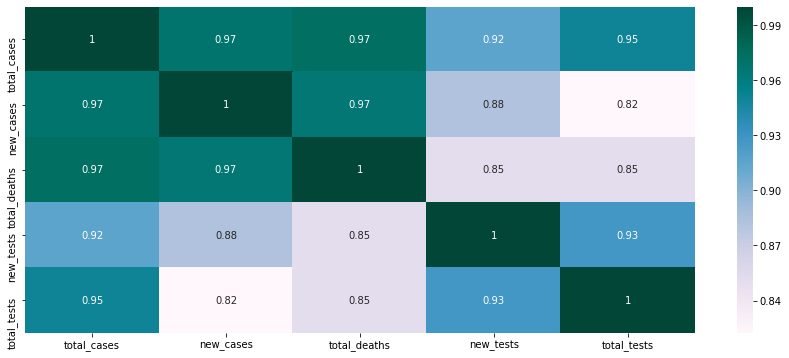

In [11]:
#heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(),annot=True,cmap="PuBuGn")

### Top 10 new cases

In [14]:
df_covid=df[df['date']=='2020-11-15']
df_covid=df_covid[~df_covid['location'].isin(['World','International'])]

In [15]:
top_10_newcases = df_covid.sort_values('new_cases',ascending = False)   #Sorting data with respect to new cases

In [16]:
top_10_newcases

iso_code      continent         location        date  total_cases  \
58382      USA  North America    United States  2020-11-15   11053501.0   
27096      ITA         Europe            Italy  2020-11-15    1178529.0   
24842      IND           Asia            India  2020-11-15    8845127.0   
19619      FRA         Europe           France  2020-11-15    2031472.0   
58059      GBR         Europe   United Kingdom  2020-11-15    1372884.0   
...        ...            ...              ...         ...          ...   
48693      SYC         Africa       Seychelles  2020-11-15        160.0   
49015      SLE         Africa     Sierra Leone  2020-11-15       2391.0   
12213      COM         Africa          Comoros  2020-11-15        579.0   
50303      SLB        Oceania  Solomon Islands  2020-11-15         16.0   
30961      LSO         Africa          Lesotho  2020-11-15       2041.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
58382   135941.0          149137.000      246292.0       628.0   
27096    33977.0           34775.000       45229.0       546.0   
24842    30548.0           41638.571      130070.0       435.0   
19619    27228.0           28040.714       44613.0       302.0   
58059    24977.0           25362.000       52026.0       168.0   
...          ...                 ...           ...         ...   
48693        0.0               0.286           NaN         0.0   
49015        0.0               1.429          74.0         0.0   
12213        0.0               2.286           7.0         0.0   
50303        0.0               0.429           NaN         0.0   
30961        0.0              10.571          44.0         0.0   

       new_deaths_smoothed  ...  gdp_per_capita  extreme_poverty  \
58382             1105.286  ...       54225.446              1.2   
27096              547.857  ...       35220.084              2.0   
24842              494.143  ...        6426.674             21.2   
19619              589.000  ...       38605.671              NaN   
58059              413.143  ...       39753.244              0.2   
...                    ...  ...             ...              ...   
48693                0.000  ...       26382.287              1.1   
49015                0.000  ...        1390.300             52.2   
12213                0.000  ...        1413.890             18.1   
50303                0.000  ...        2205.923             25.1   
30961                0.000  ...        2851.153             59.6   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
58382                151.089                10.79            19.1   
27096                113.151                 4.78            19.8   
24842                282.280                10.39             1.9   
19619                 86.060                 4.77            30.1   
58059                122.137                 4.28            20.0   
...                      ...                  ...             ...   
48693                242.648                10.55             7.1   
49015                325.721                 2.42             8.8   
12213                261.516                11.88             4.4   
50303                459.780                18.68             NaN   
30961                405.126                 3.94             0.4   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
58382          24.6                     NaN                        2.77   
27096          27.8                     NaN                        3.18   
24842          20.6                  59.550                        0.53   
19619          35.6                     NaN                        5.98   
58059          24.7                     NaN                        2.54   
...             ...                     ...                         ...   
48693          35.7                     NaN                        3.60   
49015          41.3                  19.275                       

No handles with labels found to put in legend.


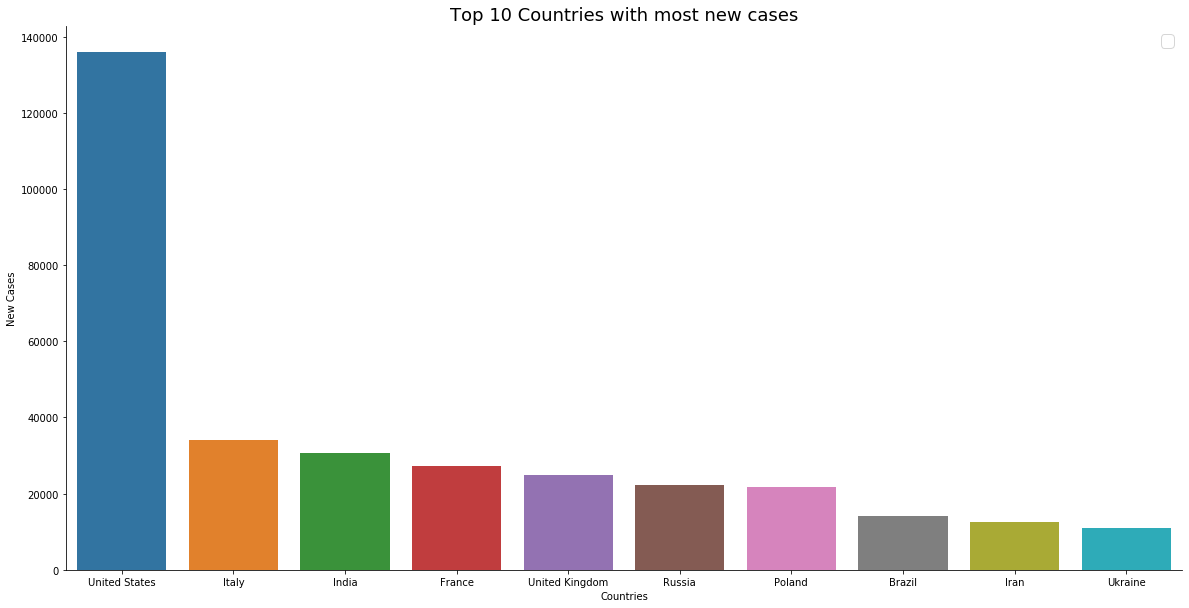

In [17]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="location", y="new_cases", data=top_10_newcases.head(10))
ax.set_ylabel(ylabel = 'New Cases', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_title('Top 10 Countries with most new cases')
ax.legend();

### Top 10 Countries with most deaths

In [18]:
total_Deaths = df_covid.sort_values('total_deaths',ascending = False)

No handles with labels found to put in legend.


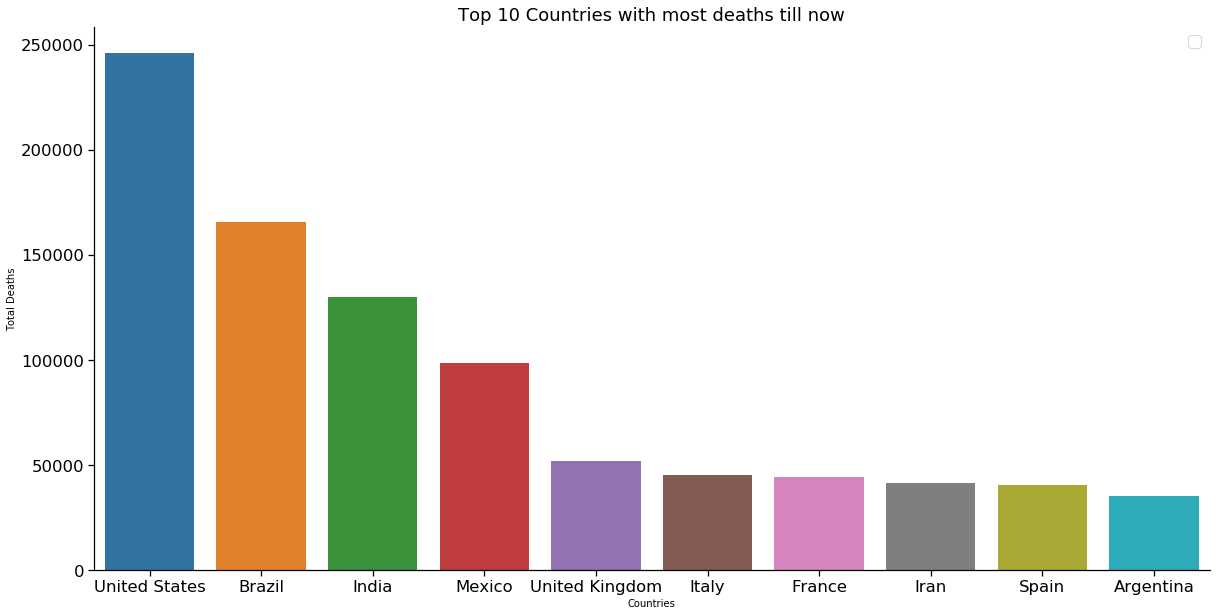

In [19]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="location", y="total_deaths", data=total_Deaths.head(10))
ax.set_ylabel(ylabel = 'Total Deaths', fontsize = 10)
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_title('Top 10 Countries with most deaths till now')
ax.legend();

### Contries with least numbers of death

In [20]:
total_Deaths['location'].tail(10)

34825                    Marshall Islands
36779                            Mongolia
45795               Saint Kitts and Nevis
46439    Saint Vincent and the Grenadines
46761                               Samoa
48693                          Seychelles
50303                     Solomon Islands
55483                               Timor
59348                             Vanuatu
59670                             Vatican
Name: location, dtype: object

In [21]:
### 

In [22]:
## Drop rows corresponding to the World
df_d = df[df.location != 'World']

In [23]:
## Sort df by date
df_d = df_d.sort_values(by=['date'])
df_latest = df_d[df_d.date == df_d.date.max()]
print("Date from the last date: ", df_latest.shape)

Date from the last date:  (190, 50)


In [56]:
df_latest.head()

iso_code continent    location        date  total_cases  new_cases  \
59694      VAT    Europe     Vatican  2020-12-09         27.0        0.0   
56473      TUN    Africa     Tunisia  2020-12-09     106856.0     1411.0   
59050      UZB      Asia  Uzbekistan  2020-12-09      74352.0      146.0   
43887      POL    Europe      Poland  2020-12-09    1088346.0    12166.0   
41633      PAK      Asia    Pakistan  2020-12-09     429280.0     3138.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
59694               0.000           NaN         0.0                0.000  ...   
56473            1082.286        3717.0        49.0               51.143  ...   
59050             145.286         611.0         0.0                0.000  ...   
43887           10657.000       21160.0       568.0              421.714  ...   
41633            3210.000        8603.0        56.0               56.857  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
59694             NaN              NaN                    NaN   
56473       10849.297              2.0                318.991   
59050        6253.104              NaN                724.417   
43887       27216.445              NaN                227.331   
41633        5034.708              4.0                423.031   

       diabetes_prevalence  female_smokers  male_smokers  \
59694                  NaN             NaN           NaN   
56473                 8.52             1.1          65.8   
59050                 7.57             1.3          24.7   
43887                 5.91            23.3          33.1   
41633                 8.35             2.8          36.7   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
59694                     NaN                         NaN            75.12   
56473                  78.687                        2.30            76.70   
59050                     NaN                        4.00            71.72   
43887                     NaN                        6.62            78.73   
41633                  59.607                        0.60            67.27   

       human_development_index  
59694                      NaN  
56473                    0.735  
59050                    0.710  
43887                    0.865  
41633                    0.562  

[5 rows x 50 columns]

### Visualization by counties - total cases per week

In [31]:
df_us = pd.read_csv('covid-19-data/us-counties.csv')
df_us['new_date'] = pd.to_datetime(df_us['date'])
df_us['Year-Week'] = df_us['new_date'].dt.strftime('%Y-%U')
df_us.head()

date     county       state     fips  cases  deaths   new_date  \
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0 2020-01-21   
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0 2020-01-22   
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0 2020-01-23   
3  2020-01-24       Cook    Illinois  17031.0      1     0.0 2020-01-24   
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0 2020-01-24   

  Year-Week  
0   2020-03  
1   2020-03  
2   2020-03  
3   2020-03  
4   2020-03

In [32]:
df_us.shape

(813417, 8)

In [33]:
# Data Preprocessing
df_us = df_us.sort_values(by=['county', 'state', 'new_date'])
df_us_week = df_us.groupby(['county', 'state', 'fips', 'Year-Week']).first().reset_index()
df_us_week
df_us_week.head(100)

county           state     fips Year-Week        date  cases  deaths  \
0   Abbeville  South Carolina  45001.0   2020-11  2020-03-19      1     0.0   
1   Abbeville  South Carolina  45001.0   2020-12  2020-03-22      1     0.0   
2   Abbeville  South Carolina  45001.0   2020-13  2020-03-29      4     0.0   
3   Abbeville  South Carolina  45001.0   2020-14  2020-04-05      6     0.0   
4   Abbeville  South Carolina  45001.0   2020-15  2020-04-12      9     0.0   
..        ...             ...      ...       ...         ...    ...     ...   
95   Accomack        Virginia  51001.0   2020-29  2020-07-19   1052    15.0   
96   Accomack        Virginia  51001.0   2020-30  2020-07-26   1063    15.0   
97   Accomack        Virginia  51001.0   2020-31  2020-08-02   1079    15.0   
98   Accomack        Virginia  51001.0   2020-32  2020-08-09   1100    16.0   
99   Accomack        Virginia  51001.0   2020-33  2020-08-16   1123    17.0   

     new_date  
0  2020-03-19  
1  2020-03-22  
2  2020-03-29  
3  2020-04-05  
4  2020-04-12  
..        ...  
95 2020-07-19  
96 2020-07-26  
97 2020-08-02  
98 2020-08-09  
99 2020-08-16  

[100 rows x 8 columns]

In [34]:
df_us_week['cases'].max(), df_us_week['cases'].min()


(449982, 1)

In [35]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

counties["features"][100]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US16067',
  'STATE': '16',
  'COUNTY': '067',
  'NAME': 'Minidoka',
  'LSAD': 'County',
  'CENSUSAREA': 757.591},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-113.931799, 42.535275],
    [-113.932904, 42.765032],
    [-113.763862, 42.764508],
    [-113.713928, 42.849733],
    [-113.714701, 43.20003],
    [-113.413693, 43.199785],
    [-113.413026, 42.84925],
    [-113.472155, 42.849218],
    [-113.472177, 42.669251],
    [-113.557609, 42.656416],
    [-113.655338, 42.535663],
    [-113.779811, 42.55687],
    [-113.931799, 42.535275]]]},
 'id': '16067'}

In [36]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [37]:
df_us_week['state_code'] = df_us_week['state'].map(us_state_abbrev)
df_us_week.head()

county           state     fips Year-Week        date  cases  deaths  \
0  Abbeville  South Carolina  45001.0   2020-11  2020-03-19      1     0.0   
1  Abbeville  South Carolina  45001.0   2020-12  2020-03-22      1     0.0   
2  Abbeville  South Carolina  45001.0   2020-13  2020-03-29      4     0.0   
3  Abbeville  South Carolina  45001.0   2020-14  2020-04-05      6     0.0   
4  Abbeville  South Carolina  45001.0   2020-15  2020-04-12      9     0.0   

    new_date state_code  
0 2020-03-19         SC  
1 2020-03-22         SC  
2 2020-03-29         SC  
3 2020-04-05         SC  
4 2020-04-12         SC

In [38]:
test = df_us_week[df_us_week.cases > 15000]
test

county       state     fips Year-Week        date  cases  deaths  \
149        Ada       Idaho  16001.0   2020-43  2020-10-25  16179   165.0   
150        Ada       Idaho  16001.0   2020-44  2020-11-01  17451   181.0   
151        Ada       Idaho  16001.0   2020-45  2020-11-08  19325   193.0   
152        Ada       Idaho  16001.0   2020-46  2020-11-15  21561   208.0   
153        Ada       Idaho  16001.0   2020-47  2020-11-22  23455   225.0   
...        ...         ...      ...       ...         ...    ...     ...   
116970  Yakima  Washington  53077.0   2020-49  2020-12-06  15928   326.0   
117796    Yuma     Arizona   4027.0   2020-46  2020-11-15  15362   365.0   
117797    Yuma     Arizona   4027.0   2020-47  2020-11-22  16700   375.0   
117798    Yuma     Arizona   4027.0   2020-48  2020-11-29  17871   392.0   
117799    Yuma     Arizona   4027.0   2020-49  2020-12-06  19643   409.0   

         new_date state_code  
149    2020-10-25         ID  
150    2020-11-01         ID  
151    2020-11-08         ID  
152    2020-11-15         ID  
153    2020-11-22         ID  
...           ...        ...  
116970 2020-12-06         WA  
117796 2020-11-15         AZ  
117797 2020-11-22         AZ  
117798 2020-11-29         AZ  
117799 2020-12-06         AZ  

[2303 rows x 9 columns]

In [39]:
df_us_week = df_us_week.sort_values(by=['Year-Week'])
fig = px.choropleth(df_us_week, locations='state_code', color='cases',
                           color_continuous_scale=px.colors.sequential.OrRd,
                           hover_name = 'state_code',
                           locationmode = 'USA-states',
                           animation_frame="Year-Week",
                          )
fig.update_layout(
    title_text = 'Weekly Total Deaths by State', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

### Continent: Asia

In [40]:
new_data=['iso_code', 'continent', 'location', 'date', 'total_cases','total_deaths','new_deaths_smoothed','population', 
              'population_density', 'median_age', 'aged_65_older','aged_70_older', 'gdp_per_capita', 'extreme_poverty',
              'cardiovasc_death_rate','diabetes_prevalence', 'female_smokers','male_smokers', 'handwashing_facilities',
              'hospital_beds_per_thousand','life_expectancy', 'human_development_index']

In [41]:
new_df=df[new_data]

In [43]:
new_df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', nan], dtype=object)

In [44]:
Asia = new_df[new_df['continent']=='Asia']
Asia.location.unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',
       'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
       'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan',
       'Tajikistan', 'Thailand', 'Timor', 'Turkey',
       'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
      dtype=object)

In [45]:
Asia.head()

iso_code continent     location       date  total_cases  total_deaths  \
0      AFG      Asia  Afghanistan 2020-01-23          NaN           NaN   
1      AFG      Asia  Afghanistan 2020-01-24          NaN           NaN   
2      AFG      Asia  Afghanistan 2020-01-25          NaN           NaN   
3      AFG      Asia  Afghanistan 2020-01-26          NaN           NaN   
4      AFG      Asia  Afghanistan 2020-01-27          NaN           NaN   

   new_deaths_smoothed  population  population_density  median_age  ...  \
0                  NaN  38928341.0              54.422        18.6  ...   
1                  NaN  38928341.0              54.422        18.6  ...   
2                  NaN  38928341.0              54.422        18.6  ...   
3                  NaN  38928341.0              54.422        18.6  ...   
4                  NaN  38928341.0              54.422        18.6  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN                597.029   
1        1803.987              NaN                597.029   
2        1803.987              NaN                597.029   
3        1803.987              NaN                597.029   
4        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         0.5            64.83                    0.498  
1                         0.5            64.83                    0.498  
2                         0.5            64.83                    0.498  
3                         0.5            64.83                    0.498  
4                         0.5            64.83                    0.498  

[5 rows x 22 columns]

In [46]:
dates=[]
dates = list(Asia.date)


In [47]:
td1 = []
India = Asia[Asia['location']=='India']
India = India.dropna()
pop = India.population.unique()
for total_deaths in India.total_cases:
    total = total_deaths/pop[0]
    td1.append(total)   

td6 = []
Nepal = Asia[Asia['location']=='Nepal']
Nepal = Nepal.dropna()
pop = Nepal.population.unique()
for total_deaths in Nepal.total_cases:
    total = total_deaths/pop[0]
    td6.append(total)

td7 = []
Bangladesh = Asia[Asia['location']=='Bangladesh']
Bangladesh = Bangladesh.dropna()
pop = Bangladesh.population.unique()
for total_deaths in Bangladesh.total_cases:
    total = total_deaths/pop[0]
    td7.append(total)
    
td8 = []
Pakistan = Asia[Asia['location']=='Pakistan']
Pakistan = Pakistan.dropna()
pop = Pakistan.population.unique()
for total_deaths in Pakistan.total_cases:
    total = total_deaths/pop[0]
    td8.append(total)

In [48]:
df_1 =list(zip(dates,td1,td6,td7,td8))

In [49]:
df_Asia = pd.DataFrame(df_1, columns = ['Date','India','Nepal','Bangladesh','Pakistan'])

In [50]:
df_Asia.head()

Date         India     Nepal    Bangladesh  Pakistan
0 2020-01-23  4.492739e-08  0.000010  8.500852e-08  0.000002
1 2020-01-24  5.289838e-08  0.000010  1.032246e-07  0.000002
2 2020-01-25  5.942010e-08  0.000013  1.214407e-07  0.000003
3 2020-01-26  7.391281e-08  0.000014  1.518009e-07  0.000004
4 2020-01-27  8.188380e-08  0.000015  1.639450e-07  0.000004

In [51]:
df_Asia = df_Asia.set_index('Date')

In [52]:
df_Asia.head()

India     Nepal    Bangladesh  Pakistan
Date                                                      
2020-01-23  4.492739e-08  0.000010  8.500852e-08  0.000002
2020-01-24  5.289838e-08  0.000010  1.032246e-07  0.000002
2020-01-25  5.942010e-08  0.000013  1.214407e-07  0.000003
2020-01-26  7.391281e-08  0.000014  1.518009e-07  0.000004
2020-01-27  8.188380e-08  0.000015  1.639450e-07  0.000004

### Total deaths per population

Text(0, 0.5, 'TOTAL DEATH PER POPULATION')

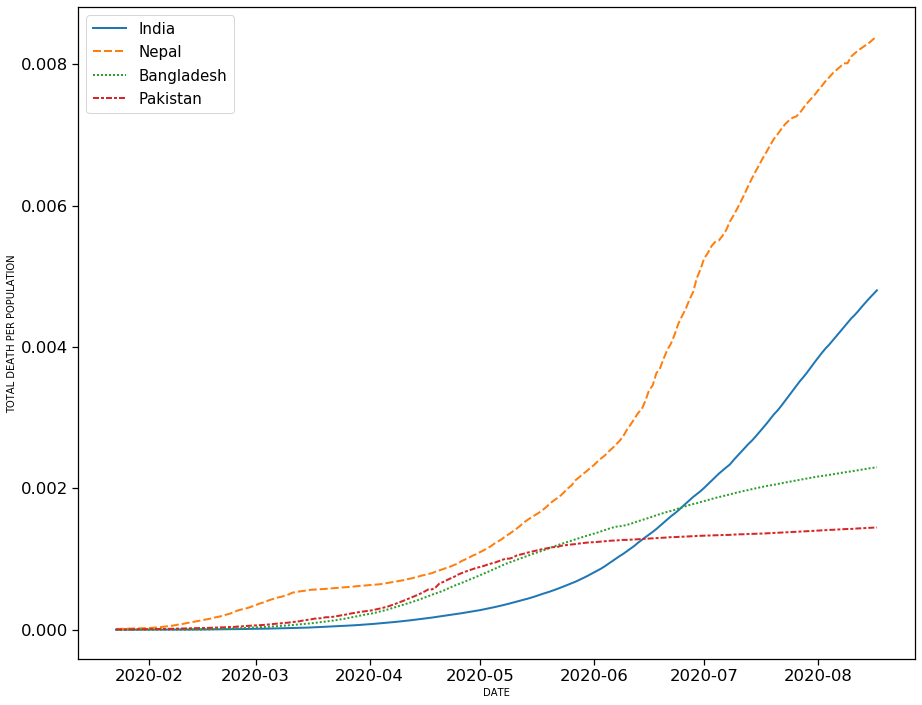

In [53]:
size = (15,12)
fig, ax = plt.subplots(figsize=size)
ax = sns.lineplot(ax=ax, data=df_Asia)
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlabel('DATE',fontsize=10)
plt.ylabel('TOTAL DEATH PER POPULATION',fontsize=10)

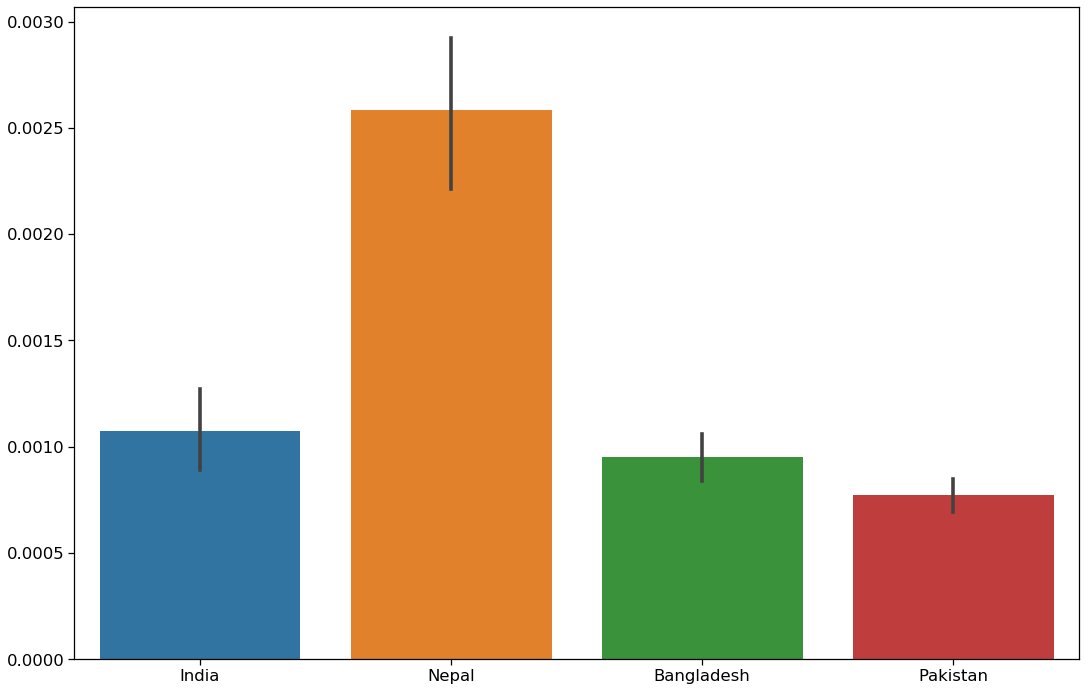

In [54]:
dims = (18,12)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(ax=ax, data=df_Asia)

### New deaths per population

In [55]:
dates_new=[]
dates_new = list(Asia.date)


nd1 = []
India = Asia[Asia['location']=='India']
India = India.dropna()
for new_deaths in India.new_deaths_smoothed:
    nd1.append(new_deaths)

nd2 = []
Nepal_new = Asia[Asia['location']=='Nepal']
Nepal = Nepal_new.dropna()
for new_deaths in Nepal.new_deaths_smoothed:
    nd2.append(new_deaths)

nd3 = []
Bangladesh = Asia[Asia['location']=='Bangladesh']
Bangladesh = Bangladesh.dropna()
for new_deaths in Bangladesh.new_deaths_smoothed:
    nd3.append(new_deaths)

nd4 = []
Pakistan = Asia[Asia['location']=='Pakistan']
Pakistan = Pakistan.dropna()
for new_deaths in Pakistan.new_deaths_smoothed:
    nd4.append(new_deaths)


In [56]:
dataframe_new = list(zip(dates_new,nd1,nd2,nd3,nd4))


df_Asia_new = pd.DataFrame(dataframe_new, columns = ['Date','India','Nepal','Bangladesh','Pakistan'])
df_Asia_new.head()

Date  India  Nepal  Bangladesh  Pakistan
0 2020-01-23  0.143  0.143       0.143     0.286
1 2020-01-24  0.143  0.286       0.143     0.429
2 2020-01-25  0.286  0.286       0.143     0.429
3 2020-01-26  0.286  0.286       0.286     0.714
4 2020-01-27  0.286  0.286       0.286     0.857

In [57]:
df_Asia_new = df_Asia_new.set_index('Date')

Text(0, 0.5, 'New Deaths PER POPULATION')

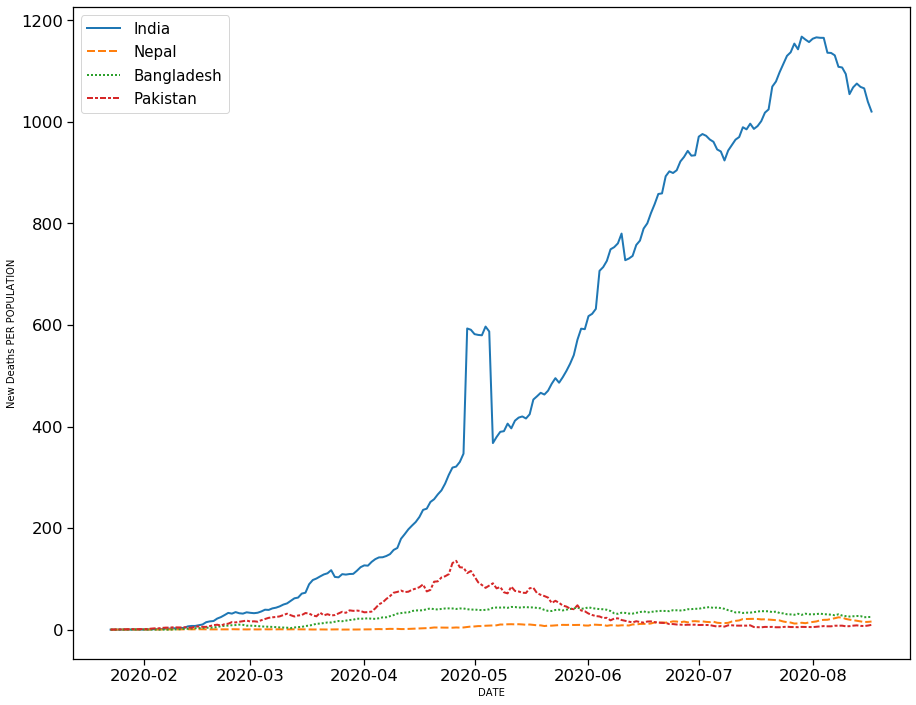

In [58]:
size = (15,12)
fig, ax = plt.subplots(figsize=size)
ax = sns.lineplot(ax=ax, data=df_Asia_new)
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlabel('DATE',fontsize=10)
plt.ylabel('New Deaths PER POPULATION',fontsize=10)

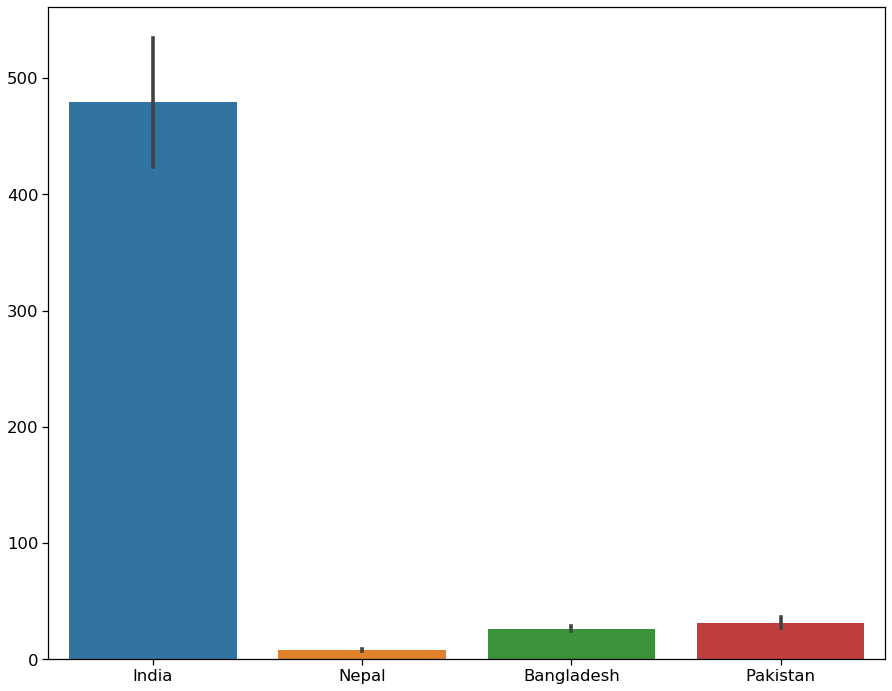

In [59]:
size = (15,12)
fig, ax = plt.subplots(figsize=size)
ax = sns.barplot(ax=ax, data=df_Asia_new)

### Country: India

In [86]:
india = df[df['location']=='India']

In [87]:
pd.DataFrame(india.isnull().sum(), columns= ['Number of missing values'])

Number of missing values
iso_code                                                   0
continent                                                  0
location                                                   0
date                                                       0
total_cases                                                7
new_cases                                                  0
new_cases_smoothed                                         5
total_deaths                                              48
new_deaths                                                 0
new_deaths_smoothed                                        5
total_cases_per_million                                    7
new_cases_per_million                                      0
new_cases_smoothed_per_million                             5
total_deaths_per_million                                  48
new_deaths_per_million                                     0
new_deaths_smoothed_per_million                            5
reproduction_rate                                         64
icu_patients                                             322
icu_patients_per_million                                 322
hosp_patients                                            322
hosp_patients_per_million                                322
weekly_icu_admissions                                    322
weekly_icu_admissions_per_million                        322
weekly_hosp_admissions                                   322
weekly_hosp_admissions_per_million                       322
new_tests                                                 70
total_tests                                               64
total_tests_per_thousand                                  64
new_tests_per_thousand                                    70
new_tests_smoothed                                        59
new_tests_smoothed_per_thousand                           59
positive_rate                                             59
tests_per_case                                            59
tests_units                                               52
stringency_index                                           9
population                                                 0
population_density                                         0
median_age                                                 0
aged_65_older                                              0
aged_70_older                                              0
gdp_per_capita                                             0
extreme_poverty                                            0
cardiovasc_death_rate                                      0
diabetes_prevalence                                        0
female_smokers                                             0
male_smokers                                               0
handwashing_facilities                                     0
hospital_beds_per_thousand                                 0
life_expectancy                                            0
human_development_index                                    0

### Total deaths v/s New death

Text(-12.985, 0.5, 'NEW DEATHS')

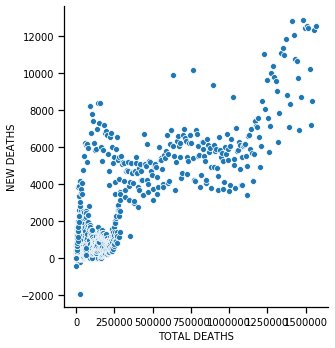

In [93]:
sns.relplot(x='total_deaths',y='new_deaths',data=india)
plt.xlabel('TOTAL DEATHS',fontsize=10)
plt.ylabel('NEW DEATHS',fontsize=10)

### Positive Rate v/s New tests smoothed per thousand

Text(-1.8599999999999994, 0.5, 'NEW TESTS SMOOTHED PER THOUSAND')

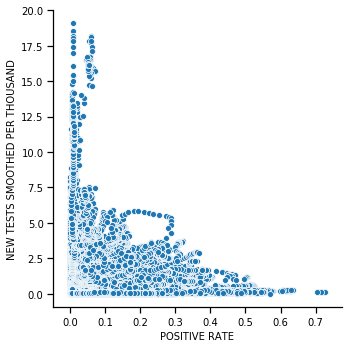

In [76]:
sns.relplot(x='positive_rate',y='new_tests_smoothed_per_thousand',data=india)
plt.xlabel('POSITIVE RATE',fontsize=10)
plt.ylabel('NEW TESTS SMOOTHED PER THOUSAND',fontsize=10)

### Positive Rate v/s New Deaths

Text(-12.985, 0.5, 'NEW DEATHS')

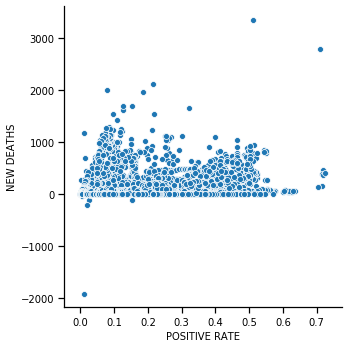

In [77]:
sns.relplot(x='positive_rate',y='new_deaths',data=india)
plt.xlabel('POSITIVE RATE',fontsize=10)
plt.ylabel('NEW DEATHS',fontsize=10)

### Total Deaths v/s Total Cases

Text(0.5, 4.639999999999979, 'TOTAL CASES')

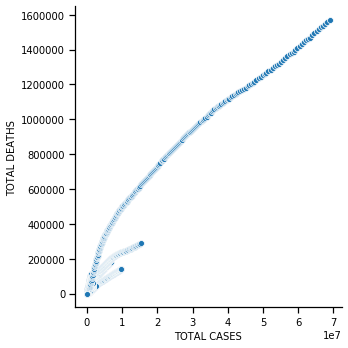

In [78]:
sns.relplot(x='total_cases',y='total_deaths',data=india)
plt.ylabel('TOTAL DEATHS',fontsize=10)
plt.x label('TOTAL CASES',fontsize=10)